<a href="https://colab.research.google.com/github/NishatVasker/XAI_-Explainable_AI-/blob/main/MLI-XAI/Lime_Original_Explaination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Model Explainability with LIME (Local Interpretable Model-Agnostic Explanations)**
- https://github.com/marcotcr/lime


In [6]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.15.0


In [7]:
inet_model = inc_net.InceptionV3()

In [8]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 [==============================] - 2s 2s/step
('n07753592', 'banana', 0.99942434)
('n07747607', 'orange', 3.082537e-05)
('n07716358', 'zucchini', 1.4992643e-05)
('n03461385', 'grocery_store', 8.61756e-06)
('n03127925', 'crate', 7.944443e-06)


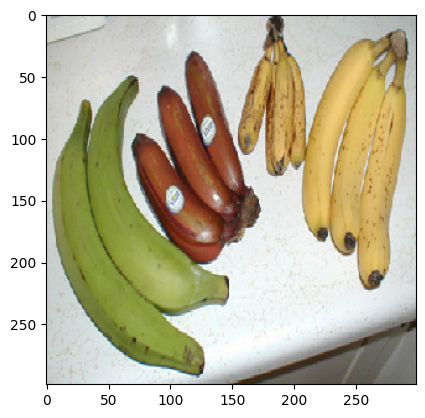

In [9]:
images = transform_img_fn([os.path.join('/content/banan.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [10]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 852.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e3d439b7b3fa645c650854b2cb9f9587ffec546601de4f33cab15fda53995c4c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [11]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [12]:
explainer = lime_image.LimeImageExplainer()

In [15]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=100)


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step
CPU times: user 42.3 s, sys: 1.14 s, total: 43.4 s
Wall time: 32.1 s


In [16]:
explanation

In [17]:
from skimage.segmentation import mark_boundaries

# **Superpixel for the top most Prediction**

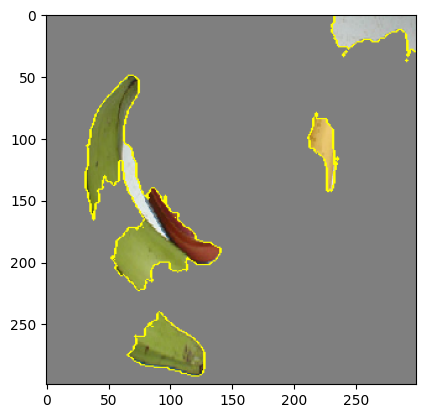

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

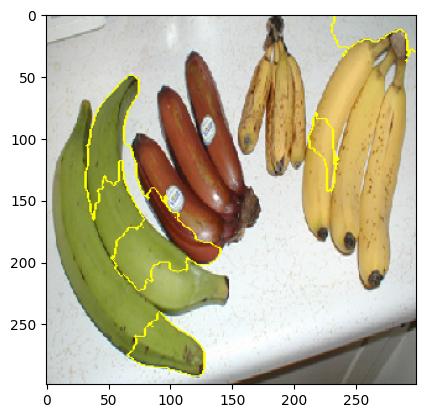

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# **Visualizing 'pros and cons'**
- pros in green
- cons in red

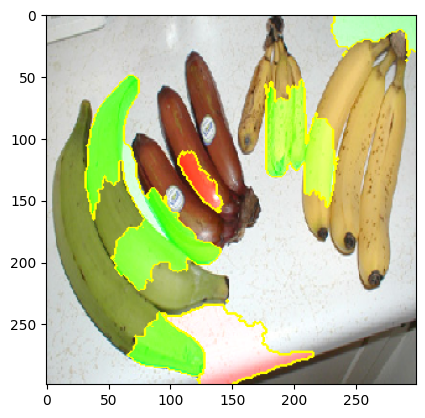

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **pros and cons**
 - With weight at least 0.1

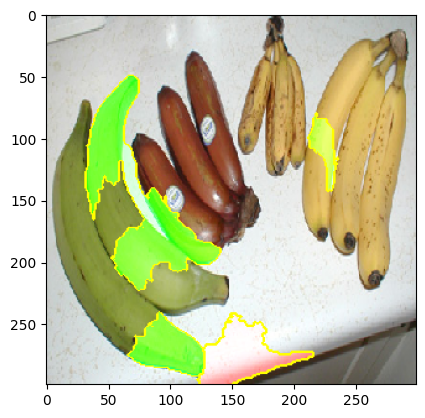

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Explaination Heatmap plot with weights**
- Colorbar shows the values of the weights.

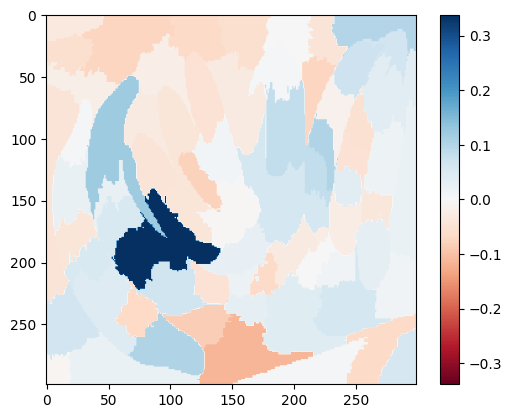

In [22]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# **Second Prediction in the list**

## **Superpixel for the second most Prediction**

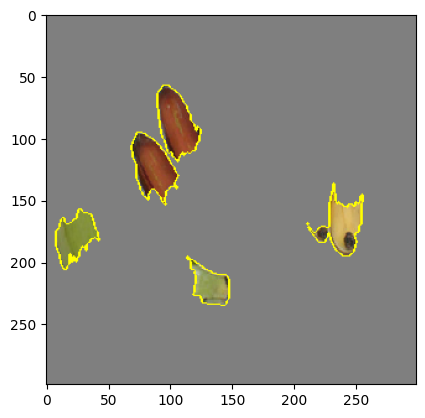

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Rest of the image from the second prediction**

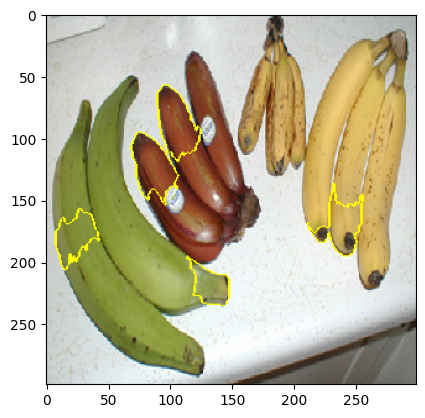

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Visualizing 'pros and cons'**
- pros in green
- cons in red

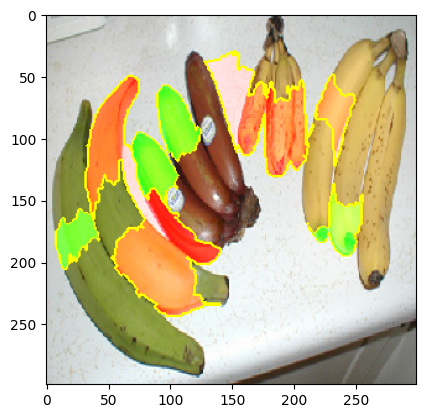

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **pros and cons**
 - that have weight at least 0.1

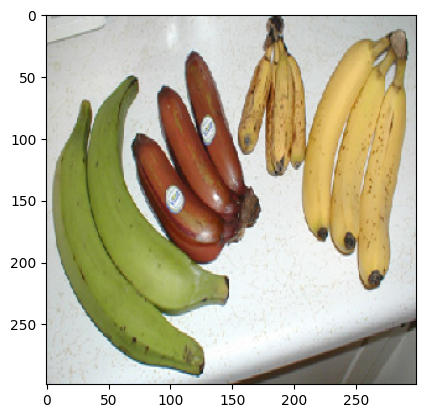

In [26]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **Explanation Heatmap plot with weights**
- Colorbar shows the values of the weights.

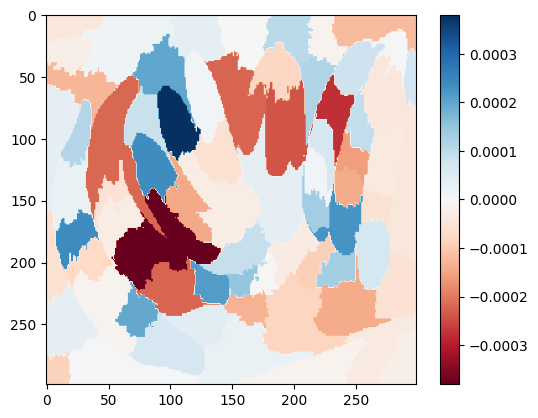

In [27]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[1]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

**NEW CODE **

In [32]:
!pip install keras

In [34]:
from keras.utils import to_categorical


In [35]:
import random
import numpy as np
import pandas as pd
import copy

# Assuming you're using a newer version of numpy where np.load requires 'allow_pickle' argument.
np_load_old = np.load  # save np.load
# modify the default parameters of np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

from skimage.segmentation import mark_boundaries
import matplotlib.pylab as plt

import itertools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

import keras
from keras import backend as K
from keras.utils import to_categorical  # updated import
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

%matplotlib inline


In [36]:
random.seed(42)
np.random.seed(42)

In [37]:
EPOCH_SIZE = 70
BATCH_SIZE = 128

In [40]:
X = np.load('./data/X.npy') # images
Y = np.load('./data/Y.npy') # labels associated to images (0 = Non IDC, 1 = IDC)
type(X), type(Y), X.shape, Y.shape

TypeError: __main__.<lambda>() got multiple values for keyword argument 'allow_pickle'